# Categorical plots with seaborn


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

###  The basic : countplot
- Displays number of categories

C:\Users\Shubham\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

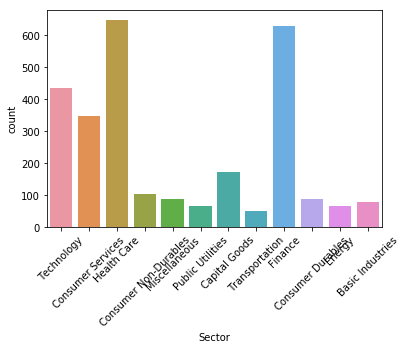

In [2]:
nasdaq = pd.read_excel('data/listings.xlsx', sheetname='nasdaq', na_values='n/a')
sns.countplot(x='Sector', data=nasdaq)
plt.xticks(rotation=45)

### countplot sorted

In [3]:
sector_size = nasdaq.groupby('Sector').size()
order = sector_size.sort_values(ascending=False)
order.head()

Sector
Health Care          645
Finance              627
Technology           433
Consumer Services    348
Capital Goods        172
dtype: int64

Text(0.5, 1.0, '#observations per Sector')

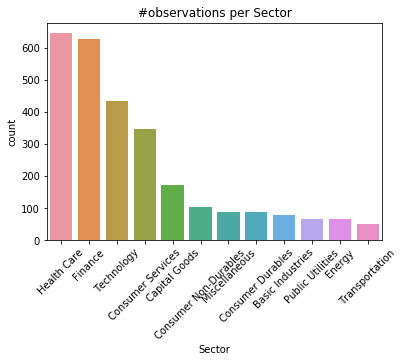

In [4]:
# extract index to list
order = order.index.tolist()
sns.countplot(x='Sector', data=nasdaq, order=order)
plt.xticks(rotation=45)
plt.title('#observations per Sector')

## Countplot with multiple categories
- Here seaborn displays a group chart with each Sector & IPO Year

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


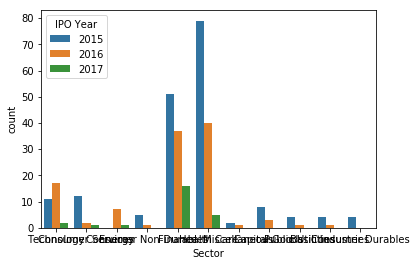

In [5]:
recent_ipos = nasdaq[nasdaq['IPO Year'] > 2014]
recent_ipos['IPO Year'] = recent_ipos['IPO Year'].astype(int)
sns.countplot(x='Sector', hue='IPO Year', data=recent_ipos)

## PointPlot : Compare statistics for more than one categorical variable

- we first create a column IPO which indicates whether the IPO occured before or after 2000
- We then add this variable(column) to hue parameter of pointplot to differentiate the `market_cap_m` with `Sector` 


Text(0.5, 1.0, 'Mean Market Cap')

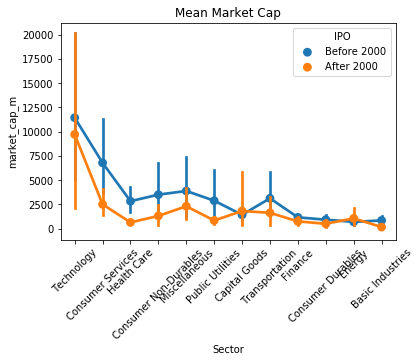

In [7]:
nasdaq['IPO'] = nasdaq['IPO Year'].apply(lambda x:'After 2000' if x > 2000 else 'Before 2000')
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)
sns.pointplot(x='Sector', y='market_cap_m', hue='IPO', data=nasdaq)
plt.xticks(rotation=45)
plt.title('Mean Market Cap')

## Plot IPO timeline for all exchanges using countplot()
- To create a basic visualization of the number of observations per category in a dataset, the seaborn countplot() function is usually the way to go
- `seaborn.countplot(x=None, hue=None, data=None, ...)`
- The x parameter contains the names of the variables in the data argument, which is the DataFrame to be plotted. hue identifies an additional categorical variable with color. These are three optional parameters out of many accepted by the function
- **Task** : compare the timeline of IPO activity across the three exchanges.

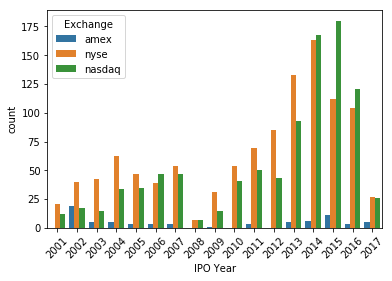

In [15]:
# Select IPOs after 2000
amex = pd.read_excel('data/listings.xlsx', sheet_name='amex', na_values='n/a')
nyse = pd.read_excel('data/listings.xlsx', sheet_name='nyse', na_values='n/a')
nasdaq = pd.read_excel('data/listings.xlsx', sheet_name='nasdaq', na_values='n/a')

amex['Exchange'] = 'amex'
nyse['Exchange'] = 'nyse'
nasdaq['Exchange'] = 'nasdaq'
                     
listings = pd.concat([amex, nyse, nasdaq])

listings = listings[listings['IPO Year'] > 2000]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listings)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Global median per capita income over time
- The seaborn barplot() function shows point estimates and confidence intervals as rectangular bars; the default function displays the mean, but it can also represent another summary statistic if you pass a particular numpy function to its estimator parameter:
- `seaborn.barplot(x=None, y=None, data=None, estimator=<function mean>, ...)`
- **Task** : use World Bank dataset containing global income per capita data for 189 countries since the year 2000.Plot and compare the median global income per capita since 2000 to the mean.

In [0]:
# Inspect the data
income_trend.info()

# Create barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create second barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Calculate several metrics by sector and IPO year
- The seaborn pointplot() function facilitates the comparison of summary statistics of a numerical variable for different levels of categorical variables.
- `seaborn.pointplot(x=None, y=None, hue=None, data=None, ...)`
- **Task** : compare the mean market capitalization for each year since 2000 for the NYSE and the NASDAQ, after excluding outliers beyond the 95th percentile. 

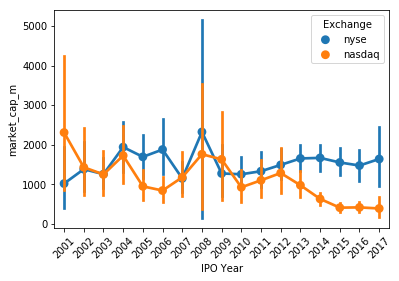

In [16]:
# Import the seaborn library as sns
import seaborn as sns

# Exclude IPOs before 2000 and from the 'amex'
listings = listings[(listings['IPO Year'] > 2000) & (listings.Exchange != 'amex')]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Exclude outliers
listings = listings[listings.market_cap_m < listings.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listings)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Distributions by category with seaborn
- Visualize numerical variables broken down by categories
- Visualize distribution of a variable differentiated by levels of a categorical variable to facilitate comparison
- examples : visualize distributions of market cap by sector or IPO year
- This type of visualization provides more details than summary stats

### Clean data : Removing Outliers
- To get a better view of data remove market_cap less than zero

In [18]:
nasdaq = pd.read_excel('data/listings.xlsx', sheetname='nasdaq', na_values='n/a')
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)
nasdaq = nasdaq[nasdaq.market_cap_m > 0] # active companies only
outliers = nasdaq.market_cap_m.quantile(.9) # outlier threshold (90th percentile)
nasdaq = nasdaq[nasdaq.market_cap_m < outliers] # remove outliers

## Boxplot : Quantiles & outliers
- Boxplot is a classic statiscal chart based on key quantiles of the distributions
- Boxplot requires that we provide a dataframe, the label of one categorical variable for the x-axis and the label of quantative variable for display on the y-axis
- After provding the data, the boxplot outlines the distribution of numeric variable `market_cap` for each level of the categorical variable sector
- The box starts at the first and ends at the third quantile, the horizontal bar at the center is the second quantile i.e the median
- **Inter Quartile range** is the difference between the first and the third quantile
- The **two whiskers** extending from the top and bottom are **1.5 times the IQR length** but limited by zero at the lower end. Data points outside this range are marked as **outliers**.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

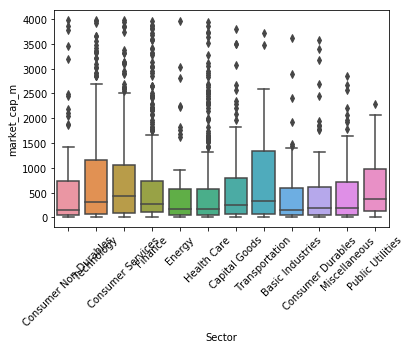

In [19]:
sns.boxplot(x='Sector', y='market_cap_m', data=nasdaq)
plt.xticks(rotation=45)

## A variation : SwarmPlot
- It displays all observations while attempting to avoid overlap
- It's useful when the number of observations are limited


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

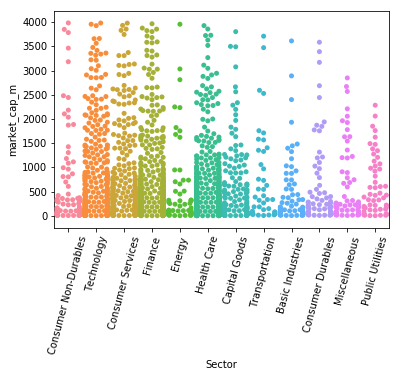

In [20]:
sns.swarmplot(x='Sector', y='market_cap_m', data=nasdaq)
plt.xticks(rotation=75)

### Inflation trends in China, India, and the US
- **Task** : examine the historical inflation data in China, India, and the US over the past 50+ years in data from FRED

In [0]:
# Inspect the inflation data
inflation.info()

# Create inflation_by_country
inflation_by_country = inflation.groupby('Country')

# Iterate over inflation_by_country and plot the inflation time series per country
for country, data in inflation_by_country:
    # Plot the data
    data.plot(title=country)
    # Show the plot
    plt.show()

### Distribution of inflation rates in China, India, and the US
- boxplot() function displays key quantiles of a distribution with respect to categories, where y represents a quantitative variable, and x a categorical variable. In statistics, this kind of distribution is known as a box-and-whisker plot.
- A complement to a box plot is a swarmplot(), which draws a categorical scatterplot that displays all categorical observations without overlapping; it takes similar arguments to boxplot()
- `seaborn.boxplot(x=None, y=None, data=None, ...)`
- `seaborn.swarmplot(x=None, y=None, data=None, ...)`
- **Task** : compare the historical distributions of inflation rates by country - specifically China, India, and the US - instead of by time series trends.


In [0]:
# Create boxplot
sns.boxplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()